## Building my Spotify music taste profile using Machine Learning

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
# load my Top tracks
top_tracks_df = pd.read_csv("./top_tracks_final.csv")
top_tracks_df.head(5)

,title,id,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,index_col,album,artist,release_year
0,Close But Not Quite,255TTKJjoyiLYixY0MDbID,0,209201,0.803,0.604,5,-9.559,1,0.126,0.593,0.002,0.189,0.558,145.994,0,Close But Not Quite,Everything Is Recorded,2017
1,I'll Remember,0FgRpZf36QtANUUiOcod0I,7,142657,0.414,0.223,1,-10.169,1,0.041,0.990,0.002,0.118,0.197,63.950,1,You & I,ALA.NI,2017
2,oh baby,53PkA8aXiwH4ppa0V0iO7o,59,349693,0.580,0.622,5,-12.005,1,0.035,0.019,0.653,0.648,0.781,169.442,2,american dream,LCD Soundsystem,2017
3,Sober Thoughts - Lido's Forgotten Sunday Service,1VkAGG7MomLsvhbIxPEzfP,6,177268,0.634,0.700,10,-8.068,1,0.266,0.004,0.000,0.130,0.592,94.956,3,Sober Thoughts (Lido's Forgotten Sunday Service),GoldLink,2016
4,Bad Decisions,184c1MtPKQENzNJd7fIh1t,0,297786,0.630,0.709,5,-8.150,0,0.035,0.049,0.008,0.128,0.407,105.992,4,Gameshow (Deluxe Edition),Two Door Cinema Club,2016


In [3]:
top_tracks_df.shape

(500, 19)

In [4]:
top_tracks_df.artist.value_counts()

Justin Bieber    30
Jaden            19
Drake            18
The Weeknd       18
Lil Uzi Vert     17
                 ..
Lil Mosey         1
Genesis Owusu     1
DJ Stretch        1
Rico Nasty        1
Naza              1
Name: artist, Length: 196, dtype: int64

In [5]:
# Load Top USA tracks
top_USA_df = pd.read_csv("./top_USA_final.csv")
top_USA_df.head(5)

,title,id,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,index_col,name_y,album,artist
0,As It Was,4LRPiXqCikLlN15c3yImP7,100,167303,0.520,0.731,6,-5.338,0,0.056,0.342,0.001,0.311,0.662,173.930,0,As It Was,As It Was,Harry Styles
1,First Class,1rDQ4oMwGJI7B4tovsBOxc,95,173947,0.905,0.563,8,-6.135,1,0.102,0.025,0.000,0.113,0.324,106.998,1,First Class,First Class,Jack Harlow
2,WAIT FOR U (feat. Drake & Tems),59nOXPmaKlBfGMDeOVGrIK,78,189893,0.463,0.642,1,-4.474,1,0.340,0.314,0.000,0.069,0.339,83.389,2,WAIT FOR U (feat. Drake & Tems),I NEVER LIKED YOU,Future
3,PUFFIN ON ZOOTIEZ,1qMMYpVatbRITKCfq1gasi,75,172933,0.883,0.657,8,-5.748,1,0.305,0.060,0.000,0.128,0.284,124.992,3,PUFFIN ON ZOOTIEZ,I NEVER LIKED YOU,Future
4,Heat Waves,02MWAaffLxlfxAUY7c5dvx,90,238805,0.761,0.525,11,-6.900,1,0.094,0.440,0.000,0.092,0.531,80.870,4,Heat Waves,Dreamland (+ Bonus Levels),Glass Animals


In [6]:
top_tracks_df.describe()

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,index_col,release_year
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,52.618,212795.160,0.688,0.578,4.934,-7.396,0.518,0.143,0.249,0.033,0.185,0.437,120.607,249.500,2018.174
std,26.732,54099.211,0.167,0.158,3.700,3.002,0.500,0.118,0.261,0.135,0.141,0.234,29.056,144.482,2.853
min,0.000,46836.000,0.153,0.030,0.000,-35.113,0.000,0.026,0.000,0.000,0.031,0.035,63.950,0.000,1992.000
25%,40.750,178379.500,0.584,0.479,1.000,-8.389,0.000,0.050,0.047,0.000,0.102,0.238,95.033,124.750,2017.000
50%,61.000,207813.000,0.712,0.581,5.000,-7.010,1.000,0.095,0.155,0.000,0.129,0.422,121.956,249.500,2019.000
75%,73.000,240504.250,0.826,0.675,8.000,-5.712,1.000,0.221,0.361,0.000,0.212,0.596,141.972,374.250,2020.000
max,91.000,479546.000,0.974,0.950,11.000,-2.015,1.000,0.920,0.994,0.924,0.847,0.965,203.944,499.000,2021.000


In [7]:
top_USA_df.describe()

,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,index_col
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,82.560,195795.680,0.679,0.620,5.120,-6.257,0.580,0.126,0.187,0.001,0.148,0.443,126.555,24.500
std,7.100,36845.063,0.156,0.143,3.718,1.793,0.499,0.102,0.199,0.003,0.097,0.271,37.139,14.577
min,71.000,106133.000,0.345,0.192,0.000,-12.151,0.000,0.027,0.000,0.000,0.042,0.085,72.993,0.000
25%,75.500,172975.750,0.577,0.534,2.000,-7.001,0.000,0.054,0.023,0.000,0.095,0.197,94.242,12.250
50%,84.000,194294.000,0.710,0.645,5.000,-6.251,1.000,0.082,0.091,0.000,0.114,0.419,127.517,24.500
75%,88.000,215178.000,0.806,0.707,8.000,-5.250,1.000,0.163,0.332,0.000,0.137,0.653,150.066,36.750
max,100.000,292799.000,0.916,0.859,11.000,-2.724,1.000,0.355,0.691,0.018,0.434,0.956,205.863,49.000


/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

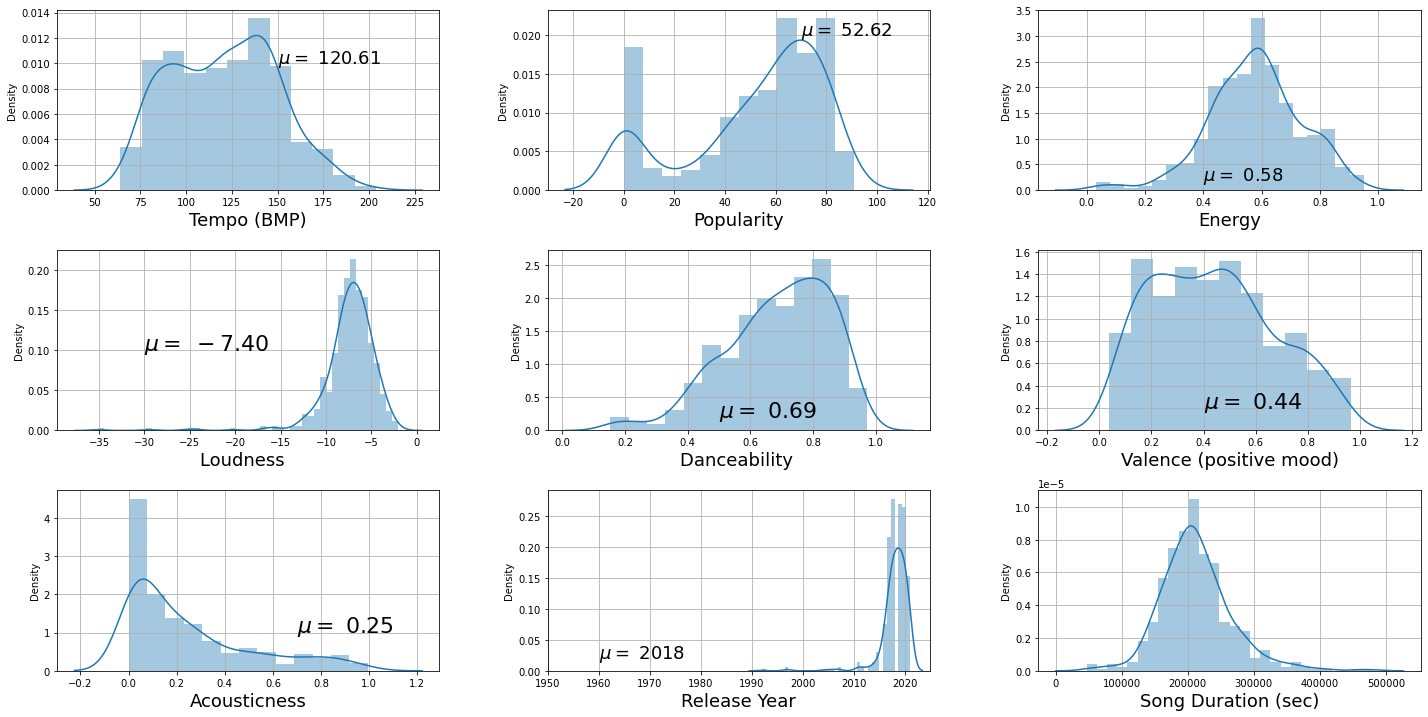

In [8]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(top_tracks_df.tempo);
plt.text(150, .010, r'$\mu=\ 120.61$', fontsize=18)
plt.xlabel('Tempo (BMP)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(top_tracks_df.popularity);
plt.text(70, .020, r'$\mu=\ 52.62$', fontsize=18)
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(top_tracks_df.energy);
plt.text(0.4, .2, r'$\mu=\ 0.58$', fontsize=18)
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(top_tracks_df.loudness);
plt.text(-30, 0.10, r'$\mu=\ -7.40$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(top_tracks_df.danceability);
plt.text(0.5, 0.2, r'$\mu=\ 0.69$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(top_tracks_df.valence);
plt.text(0.4, 0.2, r'$\mu=\ 0.44$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(top_tracks_df.acousticness);
plt.text(0.7, 1.0, r'$\mu=\ 0.25$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(top_tracks_df.release_year);
plt.text(1960, 0.02, r'$\mu=\ 2018$', fontsize=18)
plt.xlim(1950, 2025)
plt.xlabel('Release Year', fontsize=18)
plt.grid(True)


plt.subplot(339)
sns.distplot(top_tracks_df.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

#### Comparing my Top Tracks with the Top USA Tracks

/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeremyosir/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

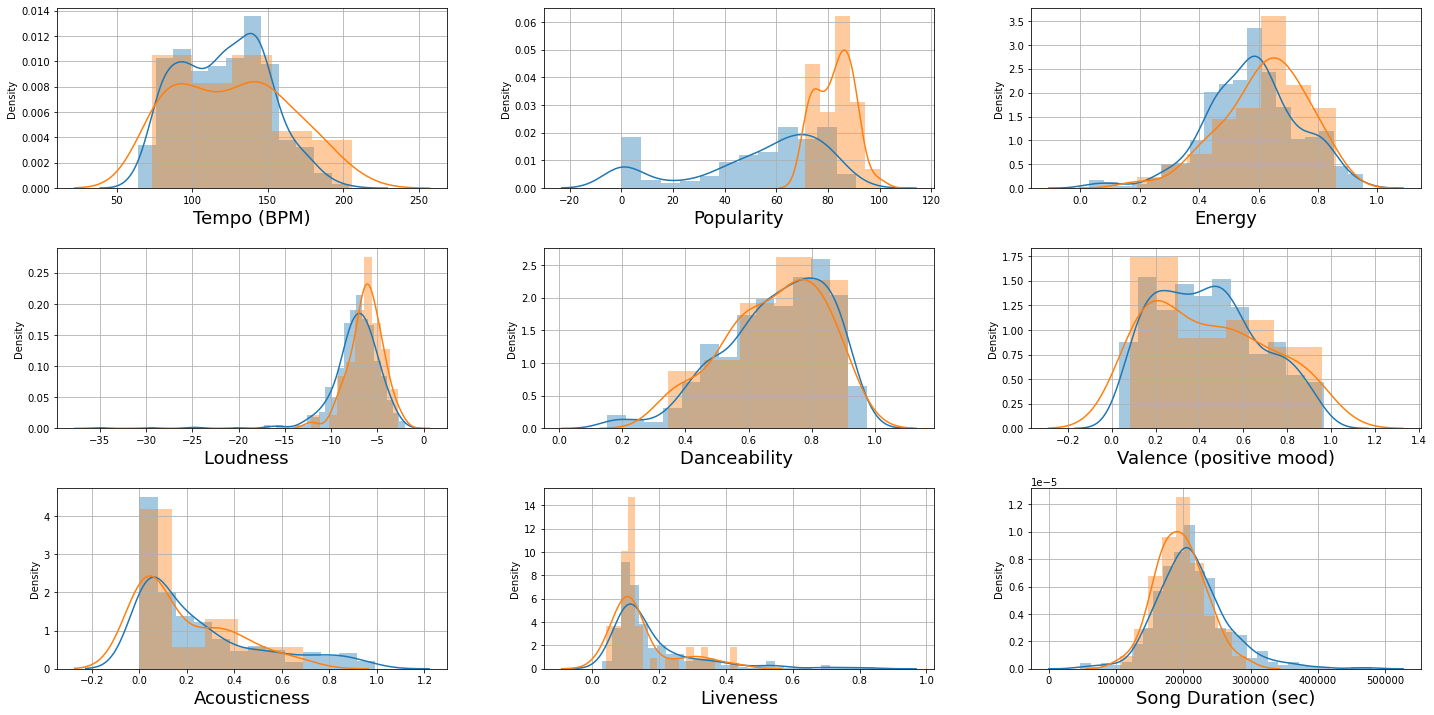

In [9]:
# Visualize distributions of liked tracks
plt.figure(1, figsize=(20, 10),)
# Adjust the subplot layout parameters
plt.subplots_adjust(hspace=0.5, wspace=1.0)

plt.subplot(331)
sns.distplot(top_tracks_df.tempo);
sns.distplot(top_USA_df.tempo);
plt.xlabel('Tempo (BPM)', fontsize=18)
plt.grid(True)

plt.subplot(332)
sns.distplot(top_tracks_df.popularity);
sns.distplot(top_USA_df.popularity);
plt.xlabel('Popularity', fontsize=18)
plt.grid(True)

plt.subplot(333)
sns.distplot(top_tracks_df.energy);
sns.distplot(top_USA_df.energy);
plt.xlabel('Energy', fontsize=18)
plt.grid(True)

plt.subplot(334)
sns.distplot(top_tracks_df.loudness);
sns.distplot(top_USA_df.loudness);
plt.xlabel('Loudness  ', fontsize=18)
plt.grid(True)

plt.subplot(335)
sns.distplot(top_tracks_df.danceability);
sns.distplot(top_USA_df.danceability);
plt.xlabel('Danceability ', fontsize=18)
plt.grid(True)

plt.subplot(336)
sns.distplot(top_tracks_df.valence);
sns.distplot(top_USA_df.valence);
plt.xlabel('Valence (positive mood)', fontsize=18)
plt.grid(True)

plt.subplot(337)
sns.distplot(top_tracks_df.acousticness);
sns.distplot(top_USA_df.acousticness);
plt.xlabel('Acousticness', fontsize=18)
plt.grid(True)

plt.subplot(338)
sns.distplot(top_tracks_df.liveness);
sns.distplot(top_USA_df.liveness);
# plt.xlim(0, 0.02)
plt.xlabel('Liveness', fontsize=18)
plt.grid(True)


plt.subplot(339)
sns.distplot(top_tracks_df.duration);
sns.distplot(top_USA_df.duration);
# plt.text(0.01, 0.02, r'$\mu=\ 212.80$', fontsize=8)
plt.xlabel('Song Duration (sec)', fontsize=18)
plt.grid(True)

plt.tight_layout(pad=1.0, w_pad=5.0, h_pad=1.0)

## Feature processing - scale the data

In [22]:
scaled_df = top_tracks_df

In [23]:
# Scale data -- use StandardScaler to normalize the data
scaler = StandardScaler()

# transform numerical features that we will use in our models -- focus on just musical attributes
scaled_df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(scaled_df[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])



In [24]:
scaled_df.columns

Index(['title', 'id', 'popularity', 'duration', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'index_col',
       'album', 'artist', 'release_year'],
      dtype='object')

In [25]:
scaled_df = scaled_df.drop(columns= ['title', 'album', 'artist', 'key', "index_col", 
                                     "id",'release_year', 'popularity','duration'])
scaled_df.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [26]:
# Project onto 2-D space using TSNE algorithm
X_scaled = TSNE(n_components=2, random_state=0).fit_transform(scaled_df)

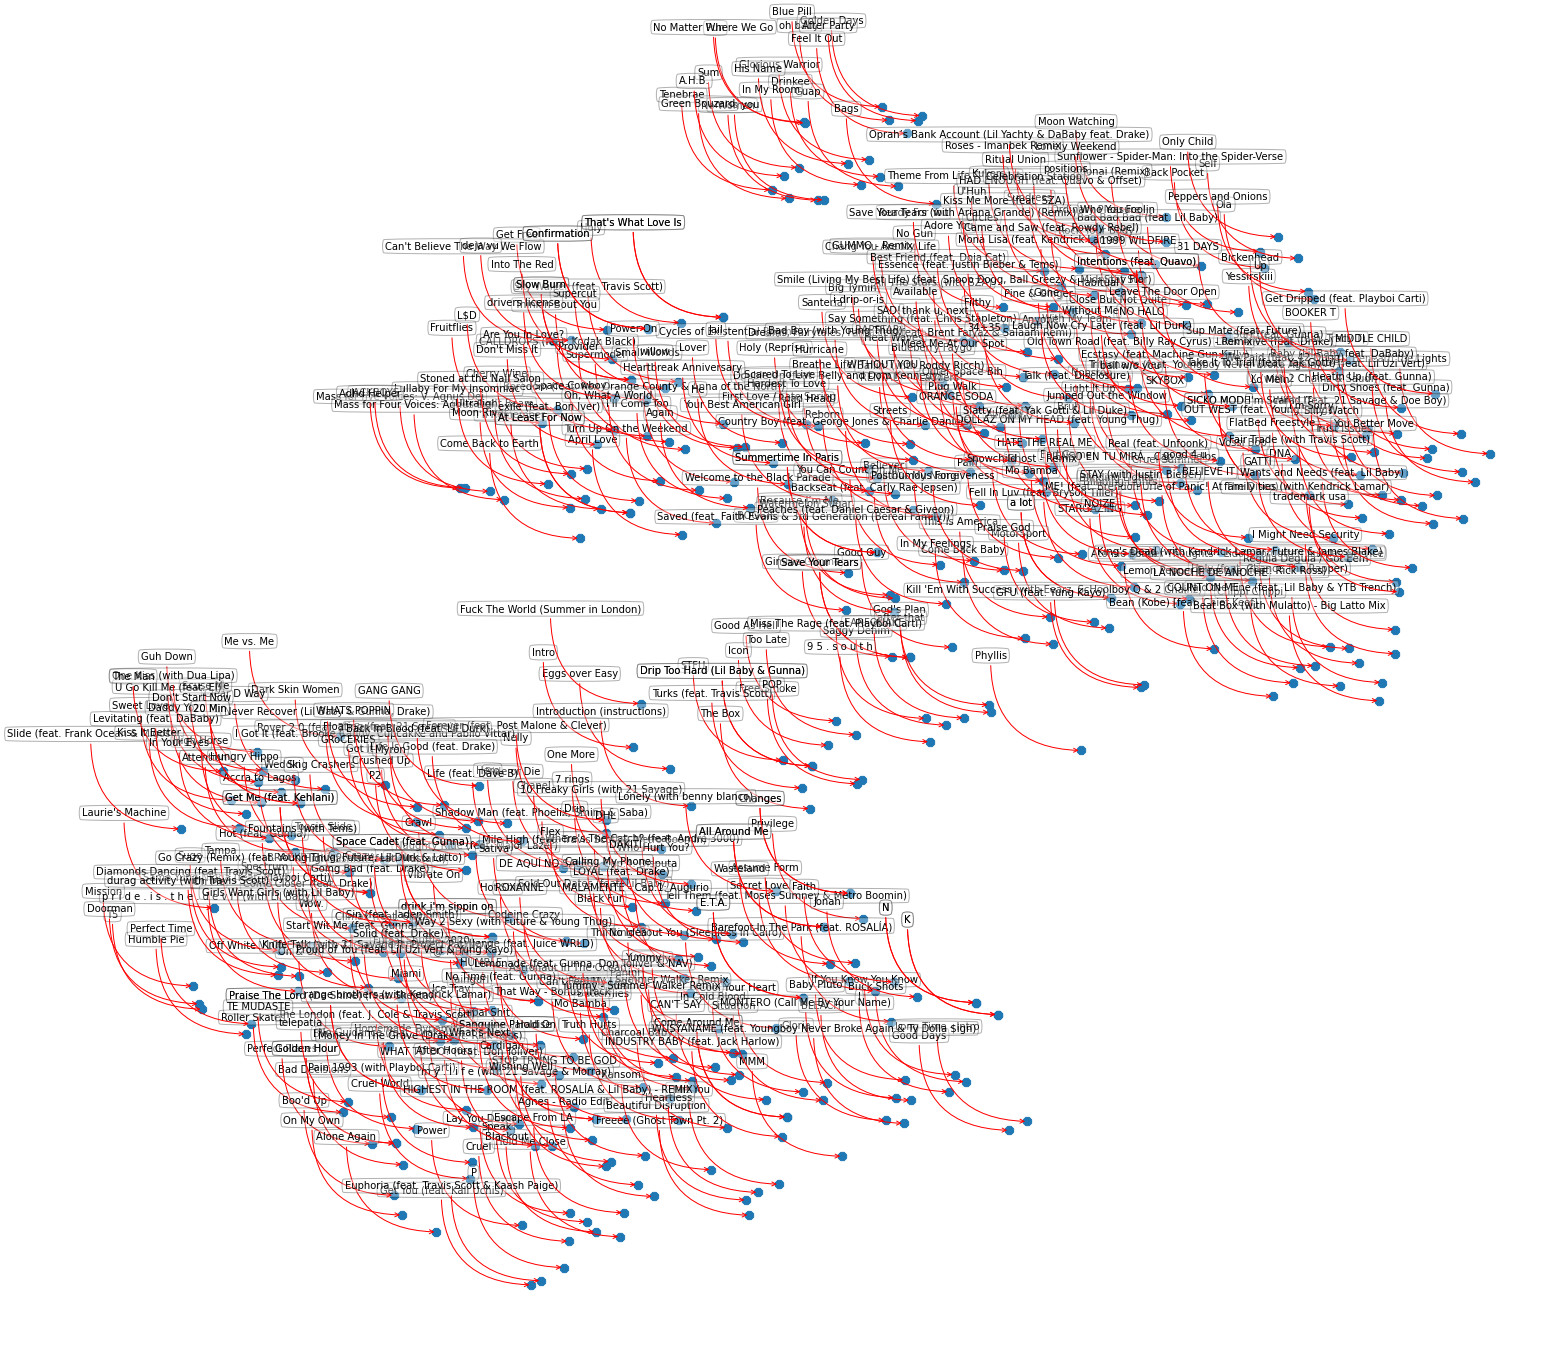

In [27]:
# Plot tracks

fig = figure(figsize=(20, 20))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_scaled[:, 0], X_scaled[:, 1], s=80,   marker="8")

for row_id in range(0, len(top_tracks_df)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = top_tracks_df.title[row_id]
        xx = X_scaled[row_id, 0]
        yy = X_scaled[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

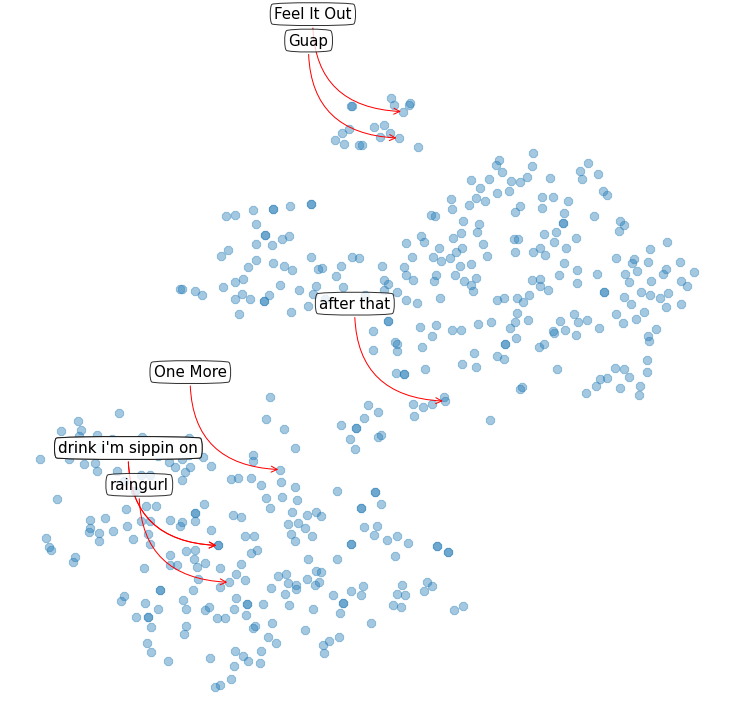

In [28]:
# Plot specific tracks

fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_scaled[:, 0], X_scaled[:, 1], s=80,   marker="8", alpha = 0.4)

for row_id in range(0, len(top_tracks_df)):
    if (top_tracks_df.artist[row_id] in ['Yaeji']):
        target_word = top_tracks_df.title[row_id]
        xx = X_scaled[row_id, 0]
        yy = X_scaled[row_id, 1]
        plt.annotate(target_word, (xx,yy), size=15, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))

In [29]:
# Instantiate PCA to project features onto 2-D space

pca_scaled = PCA(n_components=2)
pca_scaled.fit(scaled_df)

# Determine transformed features
x_pca_scaled = pca_scaled.fit_transform(scaled_df)

In [30]:
print(pca_scaled.explained_variance_ratio_) 


[0.25700818 0.13109696]


[0.25700818 0.13109696]


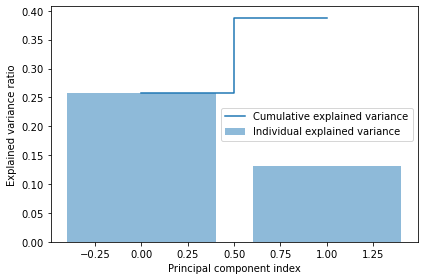

In [31]:
# Determine explained variance using explained_variance_ration_ attribute
print(pca_scaled.explained_variance_ratio_) 
exp_var_pca_scaled = pca_scaled.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca_scaled)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca_scaled)), exp_var_pca_scaled, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [63]:
clf_scaled = svm.OneClassSVM(kernel="rbf", gamma=0.02, nu=0.1)
clf_scaled.fit(x_pca_scaled)

OneClassSVM(gamma=0.02, nu=0.1)

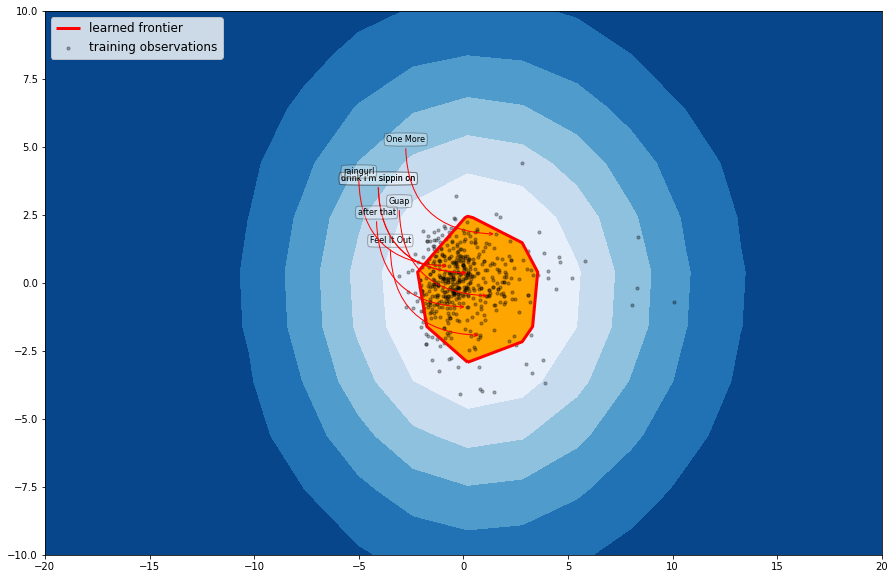

In [64]:
xx, yy = np.meshgrid(np.linspace(-500, 800, 500), np.linspace(-200,800, 500))

Z = clf_scaled.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10),)
#plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=3, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

#visualize song titles

for row_id in range(0, len(top_tracks_df)):
    if (top_tracks_df.artist[row_id] in ['Yaeji']):
        target_word = top_tracks_df.title[row_id]
        xxx = x_pca_scaled[row_id, 0]
        yyy = x_pca_scaled[row_id, 1]
        plt.annotate(target_word, (xxx,yyy), size=8, xytext=(-90,90), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                            color='red'))


b1 = plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c='black', s=10, alpha= 0.3)
plt.axis('tight')
plt.xlim((-20, 20))
plt.ylim((-10, 10))

leg = plt.legend([a.collections[0], b1, ],
           ["learned frontier", "training observations"],
           loc="upper left",prop={'size':12}, frameon=True)

plt.show()

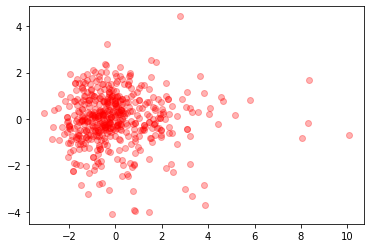

In [65]:
plt.scatter(x_pca_scaled[:, 0], x_pca_scaled[:, 1], c='red', alpha= 0.3)

In [35]:
scaled_df.shape

(500, 10)

In [36]:
### Retry - this time setting PCA n_components to be the same as number of features
# Instantiate PCA

pca_scaled_10 = PCA(n_components=10)
pca_scaled_10.fit(scaled_df)

# Determine transformed features
x_pca_scaled10 = pca_scaled_10.fit_transform(scaled_df)

In [37]:
np.cumsum(pca_scaled_10.explained_variance_ratio_ *100)

array([ 25.70081826,  38.81051466,  49.83824232,  60.33720724,
        70.12125633,  79.25445175,  87.19532372,  93.59650619,
        97.64309144, 100.        ])

Variance explained by the First principal component =  25.700818256945656
Variance explained by the First 2 principal component =  38.81051466464772
Variance explained by the First 3 principal component =  49.8382423173265
Variance explained by the First 10 principal component =  100.0


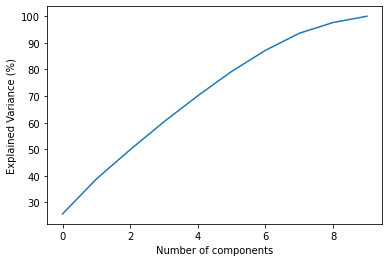

In [38]:
plt.plot(np.cumsum(pca_scaled_10.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (%)')

print('Variance explained by the First principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[0])

print('Variance explained by the First 2 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[1])

print('Variance explained by the First 3 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[2])

print('Variance explained by the First 10 principal component = ',
     np.cumsum(pca_scaled_10.explained_variance_ratio_*100)[9])



In [39]:
pca10_components = abs(pca_scaled_10.components_)
print(pca10_components)

[[0.36431705 0.47824214 0.50123768 0.00238533 0.16708576 0.4453256
  0.22891106 0.08102231 0.3050618  0.09514465]
 [0.45917994 0.38422275 0.20973254 0.18055805 0.52083817 0.05143015
  0.41558186 0.34043393 0.02052081 0.04467218]
 [0.03505909 0.04345861 0.15838093 0.27069192 0.48870072 0.15596257
  0.15274823 0.71256496 0.31112607 0.08654814]
 [0.05673096 0.06081655 0.08685348 0.67651748 0.02119012 0.1488865
  0.18558391 0.06786023 0.30562738 0.61056762]
 [0.21995256 0.03004056 0.04875901 0.30560514 0.102842   0.19149406
  0.25958187 0.0712547  0.49749772 0.69838104]
 [0.28403199 0.07322012 0.27647114 0.53010419 0.263841   0.04445235
  0.54365415 0.03228654 0.33975427 0.26998999]
 [0.15835561 0.06360388 0.00356805 0.23927213 0.05822012 0.49050776
  0.50454546 0.46525209 0.42577348 0.13159801]
 [0.44825512 0.38655528 0.16842275 0.05638611 0.59414202 0.30911764
  0.1327717  0.36387904 0.01831541 0.13844332]
 [0.47550028 0.00929323 0.47164585 0.01159046 0.04294695 0.58493863
  0.22296039 0

In [40]:
print('Top 3 most important features in each component')
print('===============================================')
for row in range(pca10_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca10_components[row]), 3)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca10_components[row])[temp])][:3]
    
    # print the top 4 feature names
    print(f'Component {row}: {scaled_df.columns[indices].to_list()}')

Top 3 most important features in each component
Component 0: ['loudness', 'energy', 'acousticness']
Component 1: ['speechiness', 'danceability', 'instrumentalness']
Component 2: ['liveness', 'speechiness', 'valence']
Component 3: ['mode', 'tempo', 'valence']
Component 4: ['tempo', 'valence', 'mode']
Component 5: ['instrumentalness', 'mode', 'valence']
Component 6: ['instrumentalness', 'acousticness', 'liveness']
Component 7: ['speechiness', 'danceability', 'energy']
Component 8: ['acousticness', 'danceability', 'loudness']
Component 9: ['energy', 'loudness', 'danceability']
